In [ ]:
# FaceNet + KNN dataset handled.

In [11]:
!pip install tensorflow

In [12]:
!pip install deepface

In [14]:
!pip install tf-keras

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------------------ --------------------- 0.8/1.7 MB 4.8 MB/s eta 0:00:01
   ------------------------------------ --- 1.6/1.7 MB 4.7 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 3.9 MB/s eta 0:00:00


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from deepface import DeepFace
import os
from tqdm import tqdm

# Load and preprocess the images
def load_images_from_folder(folder):
    images = []
    labels = []
    for label in os.listdir(folder):
        label_folder = os.path.join(folder, label)
        for filename in os.listdir(label_folder):
            img_path = os.path.join(label_folder, filename)
            images.append(img_path)
            labels.append(label)
    return images, labels

# Generate face embeddings
def generate_embeddings(images):
    embeddings = []
    for img in tqdm(images):
        try:
            # Extract embeddings using DeepFace
            embedding = DeepFace.represent(img_path=img, model_name="Facenet", enforce_detection=False)
            embeddings.append(embedding[0]['embedding'])
        except Exception as e:
            print(f"Error processing {img}: {e}")
            embeddings.append(np.zeros(128))  # Assuming the embedding dimension is 128
    return np.array(embeddings)

# Load dataset
folder_path = "./converted_images"  # Update with your dataset path
images, labels = load_images_from_folder(folder_path)

# Generate embeddings
embeddings = generate_embeddings(images)

# Split the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(embeddings, labels, test_size=0.6, random_state=42, stratify=labels)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Train a classifier (e.g., K-Nearest Neighbors)
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

# Validate the model
y_val_pred = classifier.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred, average='weighted')
val_recall = recall_score(y_val, y_val_pred, average='weighted')
val_f1 = f1_score(y_val, y_val_pred, average='weighted')

print(f"Validation Accuracy: {val_accuracy:.2f}")
print(f"Validation Precision: {val_precision:.2f}")
print(f"Validation Recall: {val_recall:.2f}")
print(f"Validation F1 Score: {val_f1:.2f}")

# Test the model
y_test_pred = classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Precision: {test_precision:.2f}")
print(f"Test Recall: {test_recall:.2f}")
print(f"Test F1 Score: {test_f1:.2f}")


100%|██████████| 400/400 [04:38<00:00,  1.44it/s]


Validation Accuracy: 0.99
Validation Precision: 0.99
Validation Recall: 0.99
Validation F1 Score: 0.99
Test Accuracy: 0.98
Test Precision: 0.99
Test Recall: 0.98
Test F1 Score: 0.98


In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


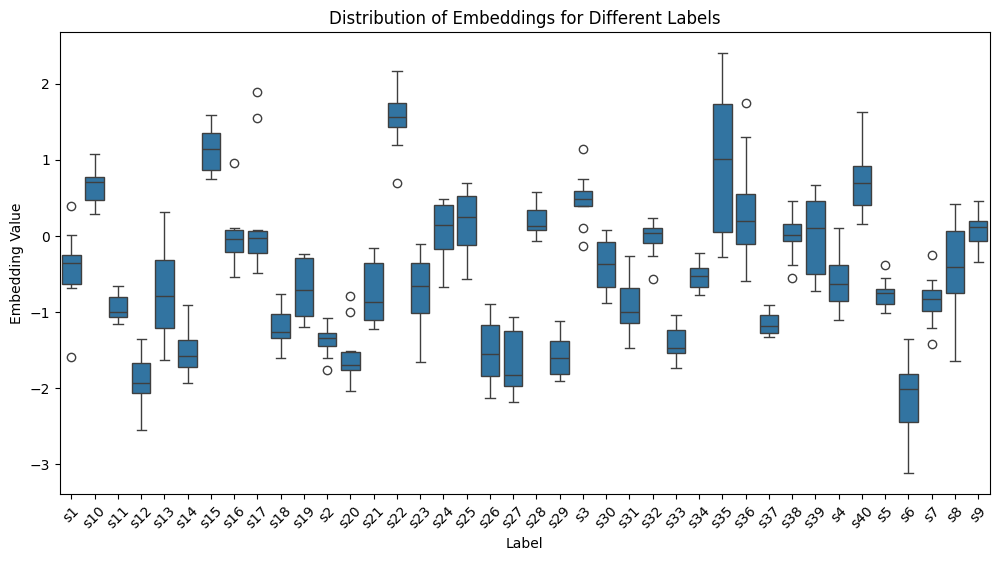

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming embeddings and labels are available

def plot_embedding_distribution(embeddings, labels):
    df = pd.DataFrame(embeddings)
    df['label'] = labels
    
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='label', y=0, data=df)
    plt.title('Distribution of Embeddings for Different Labels')
    plt.xlabel('Label')
    plt.ylabel('Embedding Value')
    plt.xticks(rotation=45)
    plt.show()

plot_embedding_distribution(embeddings, labels)